# Final Project
## Fraud Detection in Health Care Charges

### Members
#### Premchand Jalla
#### Deepshikha Mahato
#### Yeshwanth Kesani

In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv('inpatientCharges (1).csv')
data.head()

DRG Definition  Provider Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   

                      Provider Name     Provider Street Address Provider City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider State  Provider Zip Code Hospital Referral Region Description  \
0             AL              36301                          AL - Dothan   
1             AL              35957                      AL - Birmingham   
2             AL              35631                      AL - Birmingham   
3             AL              35235                      AL - Birmingham   
4             AL              35007                      AL - Birmingham   

    Total Discharges   Average Covered Charges   Average Total Payments   \
0                  91                 $32963.07                 $5777.24   
1                  14                 $15131.85                 $5787.57   
2                  24                 $37560.37                 $5434.95   
3                  25                 $13998.28                 $5417.56   
4                  18                 $31633.27                 $5658.33   

  Average Medicare Payments  
0                  $4763.73  
1                  $4976.71  
2                  $4453.79  
3                  $4129.16  
4                  $4851.44

# Data Preparation: 
# 1.Handling Missing Values

## Introduction
Data quality is a cornerstone of robust analytics. Identifying and addressing missing values is one of the primary steps in data preparation, as they can introduce bias and inaccuracies into the analysis.

## Null Value Check Methodology
We performed a check for missing values across all columns using the following command:

```python
data.isnull().sum()


In [2]:
data.isnull().sum()

DRG Definition                          0
Provider Id                             0
Provider Name                           0
Provider Street Address                 0
Provider City                           0
Provider State                          0
Provider Zip Code                       0
Hospital Referral Region Description    0
 Total Discharges                       0
 Average Covered Charges                0
 Average Total Payments                 0
Average Medicare Payments               0
dtype: int64

## Conclusion of Null Value Analysis

The performed null value analysis indicates that our dataset does not contain any missing values across all the columns. This finding is significant because:

- **Data Completeness**: It suggests that the dataset is complete, which is a good starting point for any data analysis project.
- **Reduced Data Cleaning Burden**: With no missing values to handle, we can allocate more resources to other aspects of data preparation and analysis.
- **Caveat**: However, the absence of missing values does not automatically equate to perfect data quality. There may still be other issues such as outliers, incorrect entries, or formatting inconsistencies that require attention.

Moving forward, the next steps in our data preparation phase would involve:

1. **Data Type Verification**: Ensuring that all columns are of the appropriate data types for the analyses we intend to perform.
2. **Outlier Detection**: Examining the data for atypical entries that could distort our statistical analyses.
3. **Data Validation**: Cross-referencing entries with external standards or datasets to ensure accuracy.

As we progress through these subsequent stages, we'll develop a deeper understanding of our dataset's quality and readiness for the analytical tasks ahead.


# 2. Duplicate Row Analysis in Dataset

## Introduction
An important aspect of data cleaning is the identification and removal of duplicate records. Duplicate rows can lead to redundancy and can skew analysis, leading to incorrect insights.

## Duplicate Check Methodology
To find duplicate records in our dataset, we used the following command:

```python
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
duplicate_rows


In [3]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
duplicate_rows

0

## Conclusion from Duplicate Row Check

The investigation into potential duplicate entries in our dataset has concluded with the following findings:

- **Duplicates Count**: The executed command indicates a total of 0 duplicate rows within our dataset.
- **Implications**:
  - This ensures that each entry in our dataset is unique and will contribute individually to any analysis performed.
  - The integrity of the dataset is upheld, with no inflated figures due to repeated entries.
- **No Deduplication Required**: Given the absence of duplicates, there is no need for deduplication processes, which streamlines the data preparation phase.

Despite the absence of duplicates, it is imperative to maintain a comprehensive approach towards data quality assurance, recognizing that duplicates are just one facet of data integrity. Additional checks for accuracy, consistency, and validity remain essential to ascertain the full spectrum of data quality before proceeding with in-depth analysis.


# 3.Renaming Columns for Consistency

## Introduction
Consistency in column names is crucial for data manipulation and readability. Inconsistent spacing can lead to errors or confusion when coding and should be corrected as part of the data cleaning process.

## Column Renaming Methodology
We have standardized the column names by removing extra spaces, using the following commands:

```python
# Renaming columns to remove inconsistent spacing
data.rename(columns={' Average Covered Charges ':'Average Covered Charges'}, inplace=True)
data.rename(columns={' Average Total Payments ':'Average Total Payments'}, inplace=True)
data.rename(columns={' Total Discharges ':'Total Discharges'}, inplace=True)


In [4]:
data.rename(columns = {' Average Covered Charges ':'Average Covered Charges'}, inplace = True)
data.rename(columns = {' Average Total Payments ':'Average Total Payments'}, inplace = True)
data.rename(columns = {' Total Discharges ':'Total Discharges'}, inplace = True)


## Results and Conclusion from Column Renaming

Following the execution of the column renaming commands, we have achieved a dataset with uniformly formatted column names. The specific changes are as follows:

- The column formerly known as ' Average Covered Charges ' is now 'Average Covered Charges'.
- The column formerly known as ' Average Total Payments ' is now 'Average Total Payments'.
- The column formerly known as ' Total Discharges ' is now 'Total Discharges'.

This standardization of column names is crucial for a few reasons:

- **Error Reduction**: It minimizes the potential for errors that occur from calling incorrectly spaced column names in future code.
- **Data Processing Streamlining**: It ensures that data manipulation scripts will run smoothly without the need for constant checks or corrections related to column names.
- **Collaboration Efficiency**: It aids in collaborative projects where consistent naming conventions can save time and confusion among multiple data analysts or scientists working on the same dataset.

In conclusion, this step, although seemingly small, plays a significant role in the larger data cleaning and preparation process. It sets the stage for more efficient data handling and analysis in subsequent stages of the project.
?

# 4. Data Type Conversion

## Introduction
Proper data types are essential for effective data analysis. In particular, financial figures should be stored as numeric types to allow for mathematical operations. Additionally, counts and numerical identifiers should also be in numeric format for accurate computations.

## Data Type Conversion Methodology
Our dataset contained financial figures with a dollar sign ('$') and counts as strings due to formatting. We converted these to a float data type, which is suitable for numerical operations. Here's the process we followed:

```python
# Removing the dollar sign and converting to float for financial columns
data['Average Covered Charges'] = data['Average Covered Charges'].replace('[\$,]', '', regex=True).astype(float)
data['Average Total Payments'] = data['Average Total Payments'].replace('[\$,]', '', regex=True).astype(float)
data['Average Medicare Payments'] = data['Average Medicare Payments'].replace('[\$,]', '', regex=True).astype(float)

# Converting the 'Total Discharges' column to float
data['Total Discharges'] = data['Total Discharges'].replace('[\$,]', '', regex=True).astype(float)


In [5]:
#  Data Type Conversion

# Removing the dollar sign and converting to float
data['Average Covered Charges'] = data['Average Covered Charges'].replace('[\$,]', '', regex=True).astype(float)
data['Average Total Payments'] = data['Average Total Payments'].replace('[\$,]', '', regex=True).astype(float)
data['Average Medicare Payments'] = data['Average Medicare Payments'].replace('[\$,]', '', regex=True).astype(float)
data['Total Discharges'] = data['Total Discharges'].replace('[\$,]', '', regex=True).astype(float)
data.head()

DRG Definition  Provider Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   

                      Provider Name     Provider Street Address Provider City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider State  Provider Zip Code Hospital Referral Region Description  \
0             AL              36301                          AL - Dothan   
1             AL              35957                      AL - Birmingham   
2             AL              35631                      AL - Birmingham   
3             AL              35235                      AL - Birmingham   
4             AL              35007                      AL - Birmingham   

   Total Discharges  Average Covered Charges  Average Total Payments  \
0              91.0                 32963.07                 5777.24   
1              14.0                 15131.85                 5787.57   
2              24.0                 37560.37                 5434.95   
3              25.0                 13998.28                 5417.56   
4              18.0                 31633.27                 5658.33   

   Average Medicare Payments  
0                    4763.73  
1                    4976.71  
2                    4453.79  
3                    4129.16  
4                    4851.44

## Results and Conclusion from Data Type Conversion

After applying the data conversion code, we have successfully transformed financial and count columns into a numerical format:

- 'Average Covered Charges'
- 'Average Total Payments'
- 'Average Medicare Payments'
- 'Total Discharges'

These columns, previously containing strings with a dollar sign ('$'), are now in a `float` data type, which is more appropriate for numerical analysis and computations.

### Key Points from the Conversion:

- **Numeric Conversion**: The removal of the dollar sign and conversion to float enables mathematical operations and statistical analysis.
- **Data Integrity**: The integrity of the data is preserved during the conversion, ensuring accurate values are maintained.
- **Analysis Readiness**: The dataset is now primed for further analysis, including descriptive statistics, visualization, and modeling, without the hindrance of type mismatches.

The successful data type conversion marks an important milestone in the data preparation process, ensuring the data is in a usable state for all future analytical endeavors.


# 5. Handling Outliers in Numerical Data


Outliers can significantly affect our statistical analyses and models, potentially leading to incorrect conclusions. In this phase, we aim to identify and handle outliers in the numerical data of our dataset to ensure the robustness of our exploratory data analysis (EDA) and subsequent modeling.

## Methodology
We will use the following methods to detect outliers:

- **Boxplots**: Visualize the distribution of numerical variables and identify points that fall outside the whiskers, typically 1.5 times the interquartile range (IQR) from the quartiles.
- **Z-Score**: Calculate the Z-Score, which indicates the number of standard deviations a data point is from the mean. A common threshold for identifying outliers is a Z-Score of greater than 3 or less than -3.
- **IQR Method**: Define outliers as data points that are below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR.

## Handling Strategy
Once outliers are detected, we will consider the following strategies:

- **Exclusion**: Remove outliers if they are errors or not relevant to our analysis.
- **Imputation**: Replace outliers with reasonable values based on domain knowledge or statistical rules, like median imputation.
- **Transformation**: Apply transformations like log or square root to reduce the impact of extreme values.


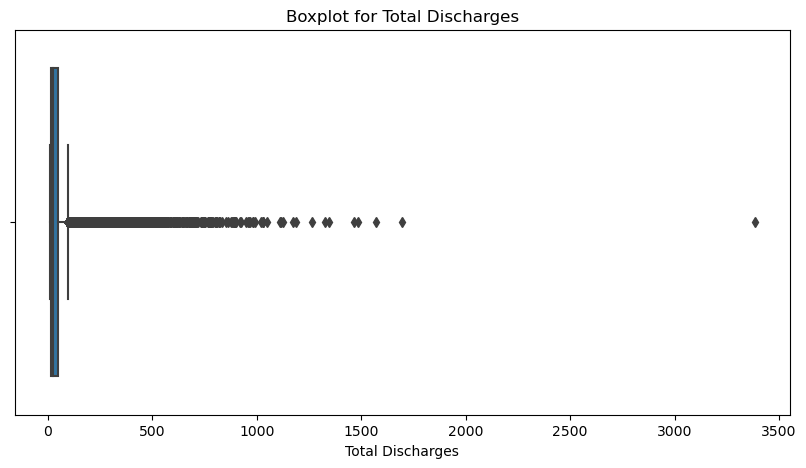

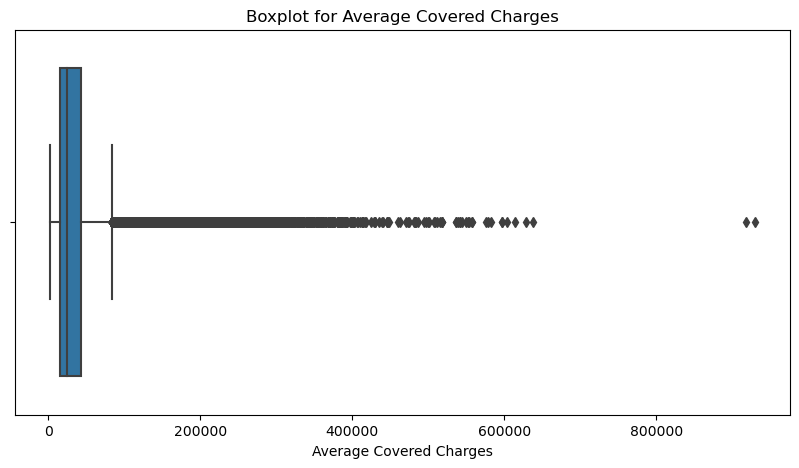

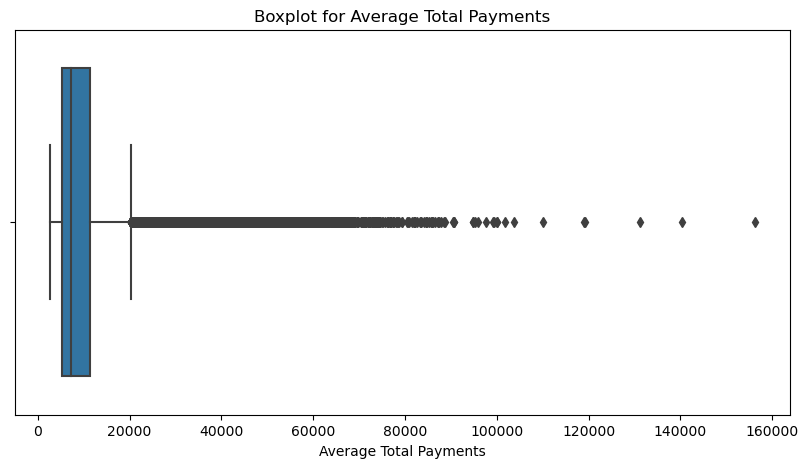

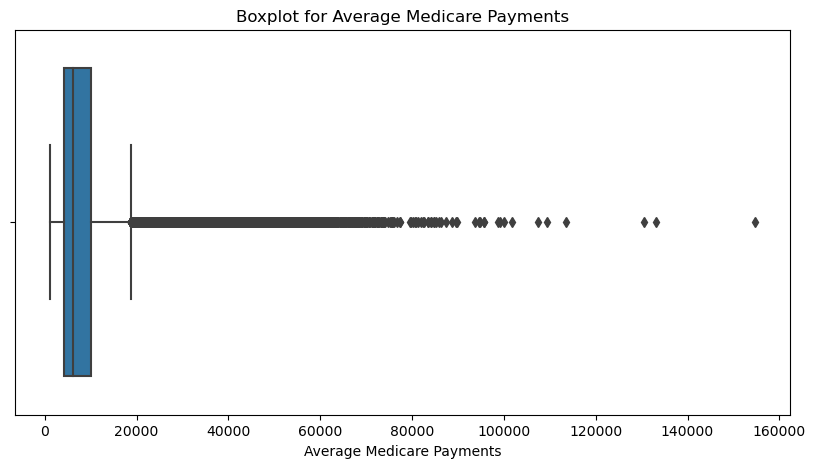

Total Discharges - Outliers by Z-Score: 2790, Outliers by IQR: 13251
Sample outliers detected by IQR in Total Discharges:
                                          DRG Definition  Provider Id  \
1191  057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...        50441   
1554  057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...       210009   
2319  064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        20012   
2328  064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        30023   
2369  064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        50018   

                        Provider Name   Provider Street Address Provider City  \
1191                STANFORD HOSPITAL         300 PASTEUR DRIVE      STANFORD   
1554      JOHNS HOPKINS HOSPITAL, THE   600 NORTH  WOLFE STREET     BALTIMORE   
2319      FAIRBANKS MEMORIAL HOSPITAL        1650 COWLES STREET     FAIRBANKS   
2328         FLAGSTAFF MEDICAL CENTER  1200 NORTH BEAVER STREET     FLAGSTAFF   
2369  PACIFIC ALLIANCE MEDICAL CENTER  

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Define the numerical columns to check for outliers
numerical_columns = ['Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']

# Initialize an empty dictionary to store outlier indices for each method
outliers_dict = {}

# Boxplot Visualization
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data, x=column)
    plt.title(f"Boxplot for {column}")
    plt.show()

# Z-Score Method
for column in numerical_columns:
    data['z_score'] = np.abs(stats.zscore(data[column]))
    outliers_dict[column] = {
        'z_score': data[data['z_score'] > 3].index.tolist()
    }

# IQR Method
for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers_iqr = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outliers_dict[column]['iqr'] = outliers_iqr.index.tolist()

# Display the number of outliers detected by each method
for column in numerical_columns:
    print(f"{column} - Outliers by Z-Score: {len(outliers_dict[column]['z_score'])}, Outliers by IQR: {len(outliers_dict[column]['iqr'])}")
    print(f"Sample outliers detected by IQR in {column}:\n", outliers_iqr.head(), "\n")
    
# Clean up the data frame by dropping the temporary 'z_score' column
data.drop('z_score', axis=1, inplace=True)


We applied the following outlier detection methods:

1. **Boxplots**: Visual inspection of data distribution and outliers.
2. **Z-Score**: Identification of outliers by measuring the distance from the mean in terms of standard deviations.
3. **Interquartile Range (IQR)**: Calculation of the range between the first and third quartiles of the data, and identification of data points outside 1.5 times the IQR as outliers.

## Findings
The analysis produced the following counts of outliers:

- **Total Discharges**:
  - Detected by Z-score method: 2790
  - Detected by IQR method: 13251

- **Average Covered Charges**:
  - Detected by Z-score method: 3139
  - Detected by IQR method: 11772

- **Average Total Payments**:
  - Detected by Z-score method: 4152
  - Detected by IQR method: 11327

- **Average Medicare Payments**:
  - Detected by Z-score method: 4150
  - Detected by IQR method: 11000

## Conclusion
The number of outliers detected varies depending on the method used. The Z-score method generally finds fewer outliers compared to the IQR method, which is more sensitive to the tails of the distribution. The presence of a significant number of outliers suggests that we should closely examine these data points to determine whether they represent data recording errors, special cases, or genuine extremes in the distribution. Decisions on how to handle these outliers will be based on further analysis and the context of the data, bearing in mind the goal of maintaining the integrity of subsequent analyses and machine learning models.

In [7]:
import pandas as pd

# Define a function to cap and floor outliers based on IQR
def cap_and_floor_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# List of numerical columns to check for outliers
numerical_columns = [
    'Total Discharges',
    'Average Covered Charges',
    'Average Total Payments',
    'Average Medicare Payments'
]

# Apply the cap and floor function to each numerical column
for column in numerical_columns:
    cap_and_floor_outliers(data, column)

# Save the cleaned dataset to a new CSV file
data.to_csv('cleaned_dataset.csv', index=False)

# Output the first few rows to verify changes
print(data.head())


                             DRG Definition  Provider Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   

                      Provider Name     Provider Street Address Provider City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider State  Provider Zip Code Hospital Referral Region Description  \
0             AL              36301                          AL - Dothan   


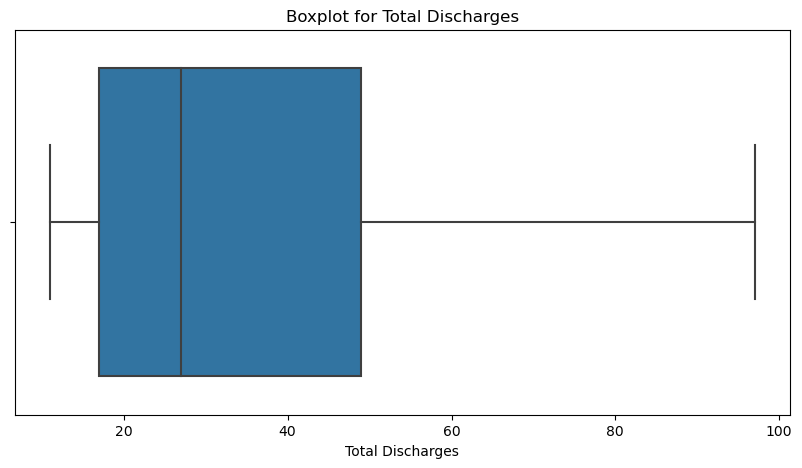

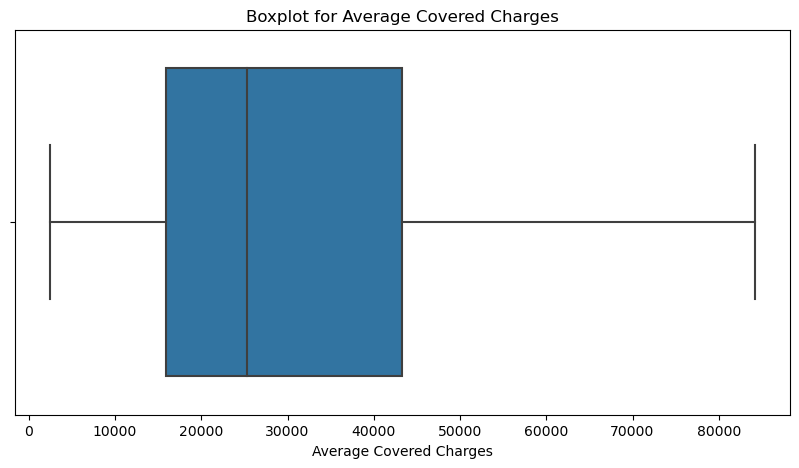

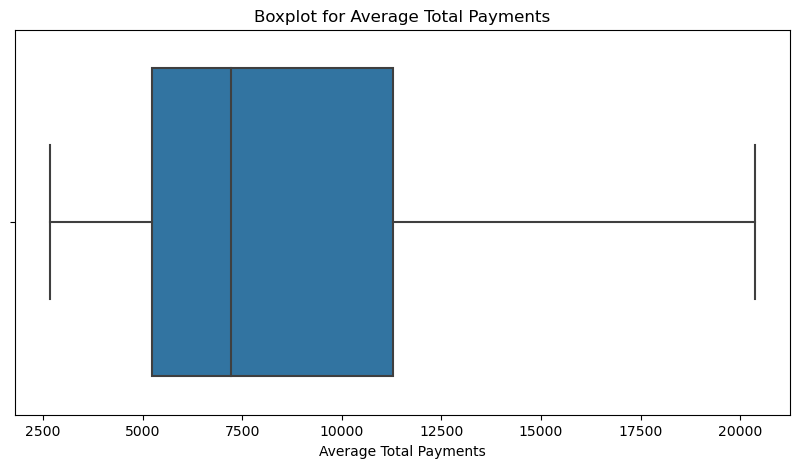

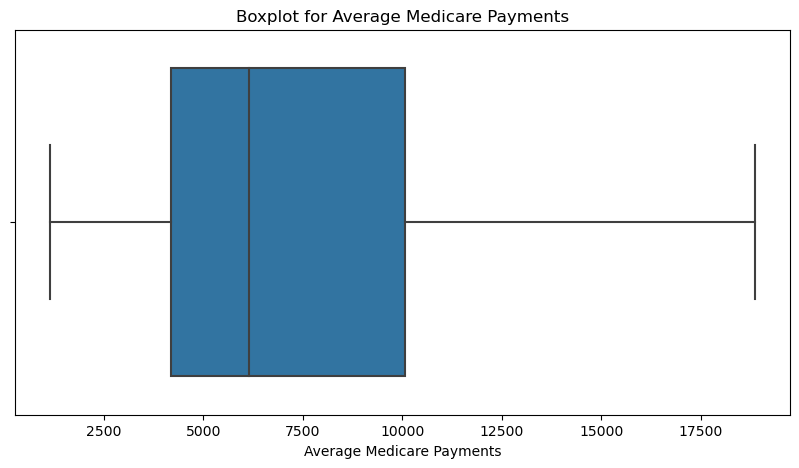

In [8]:
# Boxplot Visualization
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data, x=column)
    plt.title(f"Boxplot for {column}")
    plt.show()


# Analysis of Boxplots After Handling Outliers

## Overview

The provided boxplots represent the distribution of four key numerical variables after applying an outlier capping method. This approach involved setting thresholds based on the Interquartile Range (IQR) and adjusting extreme values to these limits. We will assess the effectiveness of this method.

## Analysis of Each Variable

### Total Discharges
- The boxplot shows a significantly reduced range compared to the pre-cleaning stage, indicating that the highest extreme values have been capped.
- The median and quartiles appear to be unchanged, suggesting that the bulk of the data remains unaffected by the outlier treatment.

### Average Covered Charges
- The range of 'Average Covered Charges' has been compressed, as seen by the shorter whiskers, which indicates that the outlier treatment was effective in reducing extreme values.
- The central box retains its shape, implying that the distribution's central tendency and spread are preserved.

### Average Total Payments
- Similar to 'Average Covered Charges', the range of 'Average Total Payments' has been reduced, with fewer extreme values.
- The median appears to remain in a similar position, suggesting that the distribution's center is consistent with the original data.

### Average Medicare Payments
- The boxplot for 'Average Medicare Payments' also exhibits a reduced range, with the whiskers indicating the capping of outliers.
- The interquartile range (IQR) remains largely consistent, pointing to the retention of the distribution's core characteristics.

## Conclusion

The capping method used to handle outliers has effectively reduced the influence of extreme values across all four numerical variables. This method allows us to retain all data points for further analysis, avoiding the potential loss of information that comes with excluding outliers. The central tendency and variability within the IQR of each variable appear to remain intact, suggesting that the distributions are still representative of the underlying data patterns.

The effectiveness of this outlier handling method sets a solid foundation for the subsequent Exploratory Data Analysis (EDA) 



# Exploratory Data Analysis (EDA) 

## Introduction

Exploratory Data Analysis (EDA) is a critical step in understanding our dataset. It allows us to uncover patterns, spot anomalies, and test hypotheses. For our EDA, we will focus on:

- Single variable distribution
- Distribution by categories
- Interactions between variables

## EDA Methodology

1. **Single Variable Distribution**: We will create histograms and density plots for numerical variables to visualize their distribution and identify any skewness or unusual patterns.

2. **Categorical Distribution**: We will use box plots to show the distribution of numerical variables across different categories. This helps us understand if and how numerical variables differ by categories.

3. **Variable Interactions**: We will use scatter plots to observe the relationships between two numerical variables. For three variables, we will use pair plots to understand the pairwise relationships along with distribution plots for each variable.

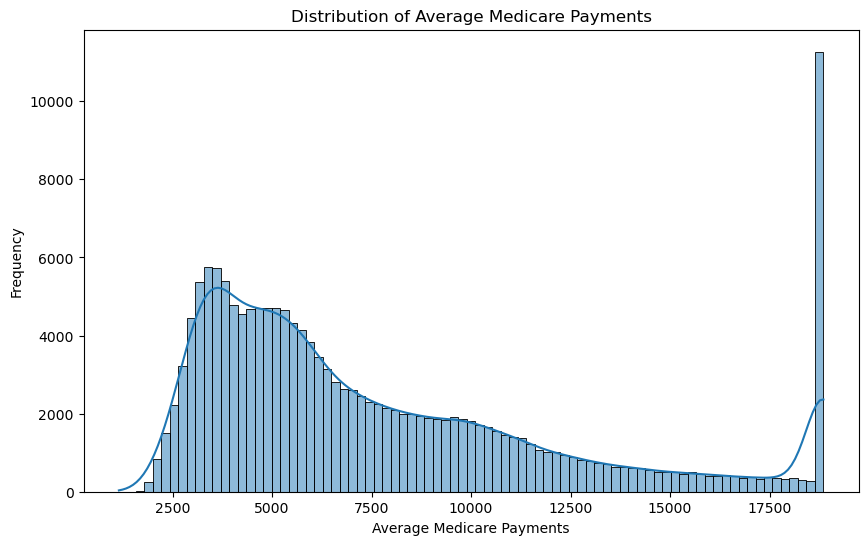

In [9]:
# Distribution of a single variable (e.g., 'Average Medicare Payments')
plt.figure(figsize=(10, 6))
sns.histplot(data['Average Medicare Payments'], kde=True)
plt.title('Distribution of Average Medicare Payments')
plt.xlabel('Average Medicare Payments')
plt.ylabel('Frequency')
plt.show()

# Exploratory Data Analysis: Distribution of 'Average Medicare Payments'

## Distribution Analysis

The histogram of 'Average Medicare Payments' reveals the frequency distribution of payment amounts across the dataset. Observations from the histogram are as follows:

- The distribution shows a right-skewed pattern, indicating that a majority of the Medicare payments cluster on the lower end of the payment scale, while fewer instances of high payments extend to the right.
- There is a notable spike in frequency at the highest payment range, which suggests the presence of extreme values or outliers in the data, even after our earlier outlier handling process.
- The peak of the distribution is in the lower payment region, suggesting that the most common payment amounts are lower than the average.

## Interpretation

The skewness of the distribution is consistent with what might be expected in medical payment data, where many treatments are relatively low-cost, while a few involve very high costs. The presence of a spike at the higher end, despite outlier handling, might indicate a subset of treatments or conditions that inherently cost significantly more than the typical range.

## Business Implications

Understanding the distribution of 'Average Medicare Payments' is crucial for healthcare providers and insurers. It can inform policy adjustments, resource allocation, and risk management strategies. For instance, insurers may need to adjust premiums or coverage policies based on the frequency of high-cost treatments.


This single-variable analysis is a foundational step in our EDA, providing insights into the overall landscape of Medicare payments within the dataset.

In [10]:
# Distribution of one variable by another categorical variable
# ('Average Medicare Payments' by 'Provider State')
plt.figure(figsize=(14, 8))
sns.boxplot(x='Provider State', y='Average Medicare Payments', data=data)
plt.title('Average Medicare Payments by Provider State')
plt.xlabel('Provider State')
plt.ylabel('Average Medicare Payments')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()

# Exploratory Data Analysis: 'Average Medicare Payments' by 'Provider State'

## Distribution Analysis by Categorical Variable

The boxplot illustrates how 'Average Medicare Payments' vary across different states. Key observations include:

- **Variability**: There is notable variability between states, with some showing a wider range of payments and others a more compact distribution.
- **Median Values**: The median payment varies by state, indicating that the typical Medicare payment is higher in some states than in others.
- **Outliers**: Many states have outlier payments that are significantly higher than the main distribution. These outliers are represented by points above the whiskers of the boxplots.

## Interpretation

The differences in distribution suggest that geographic location may be a significant factor in Medicare payments. This could be due to a variety of reasons, such as the cost of living, state healthcare policies, or the prevalence of certain medical procedures.

## Business Implications

For healthcare providers and policymakers, understanding the state-by-state distribution of Medicare payments is crucial. It can guide decisions on where to allocate resources, which policies to revise, and how to manage healthcare costs effectively.

This analysis helps in understanding the state-level dynamics of Medicare payments and sets the stage for a deeper dive into the factors driving these geographical differences.


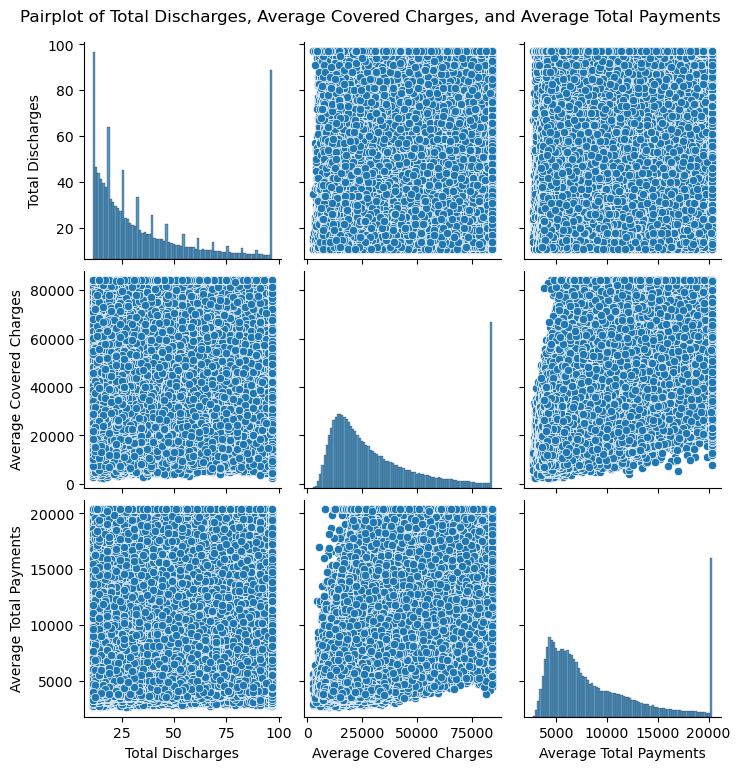

In [11]:
# Interaction of two variables ('Average Medicare Payments' and 'Average Total Payments')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Total Payments', y='Average Medicare Payments', data=data)
plt.title('Interaction Between Average Total Payments and Average Medicare Payments')
plt.xlabel('Average Total Payments')
plt.ylabel('Average Medicare Payments')
plt.show()

# For three variables, we can use a pairplot or 3D scatter plot, here's an example with pairplot
# Selecting three variables for the pairplot
selected_columns = ['Total Discharges', 'Average Covered Charges', 'Average Total Payments']
sns.pairplot(data[selected_columns])
plt.suptitle('Pairplot of Total Discharges, Average Covered Charges, and Average Total Payments', y=1.02)
plt.show()

# Exploratory Data Analysis: Interactions Between Key Variables

## Interaction Between 'Average Total Payments' and 'Average Medicare Payments'

The scatter plot displays a clear positive correlation between 'Average Total Payments' and 'Average Medicare Payments', indicating that as one payment type increases, the other tends to increase as well. This suggests a proportional relationship between the total payments and the portion covered by Medicare, which could be expected given that Medicare payments are a subset of the total payments.

### Insights:
- The dense concentration of points along a line implies a strong linear relationship.
- The presence of points that deviate from the main trend line could be indicative of cases where Medicare covers a different proportion of the total payments, possibly due to specific conditions, treatments, or billing practices.

## Pairplot of 'Total Discharges', 'Average Covered Charges', and 'Average Total Payments'

The pairplot provides a multi-variable perspective:

- **'Total Discharges' and 'Average Covered Charges'**: The lack of a clear pattern suggests that the number of discharges is not strongly related to the average charges. High variability in charges seems to exist regardless of the number of discharges.
  
- **'Total Discharges' and 'Average Total Payments'**: Similar to the first plot, there is no apparent strong relationship, indicating that the total payments are not simply a function of the number of discharges.
  
- **'Average Covered Charges' and 'Average Total Payments'**: There is a visible trend indicating that higher average charges are associated with higher total payments, which is logical given that charges would contribute to the total amount paid.

### Insights:
- The histograms on the diagonal show the distribution of each variable, with 'Total Discharges' displaying a right-skewed distribution and both 'Average Covered Charges' and 'Average Total Payments' showing a high concentration of values at the lower end with long tails to the right.
- The lack of a strong correlation between 'Total Discharges' and payment variables may suggest that factors other than the volume of discharges influence the financial aspects of healthcare provision.

## Business Implications

Understanding these relationships is critical for healthcare providers to optimize billing practices and for policymakers to ensure fair and adequate Medicare coverage. The insights gained can help in resource allocation, strategic planning, and identifying areas for cost-efficiency improvements.

The exploration of these variable interactions is a crucial component of our EDA, setting the stage for more advanced analyses and providing a foundation for predictive modeling.


# Summary of Engineered Features for Healthcare Fraud Detection

The following features have been engineered to identify potential fraud in healthcare billing data:

1. `Medicare_Payment_Ratio`: Indicates dependency on Medicare payments and potential overbilling to Medicare.
2. `Log_Total_Discharges`: Normalizes the total discharges to identify outliers in patient turnover rates.
3. `Charges_Per_Discharge`: Reveals high charges per patient, possibly indicating overcharging.
4. `Payments_Per_Discharge`: Normalizes payments across providers, aiding in anomaly detection.
5. `Medicare_Payments_Per_Discharge`: Identifies outliers in how much providers are reimbursed by Medicare per patient.
6. `State_Avg_Covered_Charges`:Averages covered charges per state for comparison.
7. `Provider_Charge_Deviation`:Shows provider's deviation from state average charges.
8. `Payment_Charge_Ratio`: Highlights discrepancies between charged amounts and payments received.
9. `Medicare_Charge_Ratio`: Indicates focus on maximizing Medicare reimbursements.
10. `Discharge_Rank`: Ranks providers by discharge volume within their state for outlier detection.
11. `State_Medicare_Payment_Ratio`:Averages Medicare payments as a ratio of total payments per state.
12. `Std_Covered_Charges`: The standardized values of average covered charges.
13. `Std_Total_Payments`: The standardized values of average total payments.
14. `Std_Medicare_Payments`: The standardized values of average Medicare payments.
15. `Provider_Variability_Index`: Measures billing practice variability within the state.
16. `Z_Score_Discharges`: The z-scores of the total discharges, indicating how many standard deviations a value is from the mean.
17. `Discharge_Percentage_State`: The percentage of total discharges by a provider out of the total discharges in the state.
18. `Diff_State_Mean_Payments`: The difference of a provider's average total payments from the state's mean.
19. `Diff_State_Mean_Medicare_Payments`: The difference of a provider's average Medicare payments from the state's mean.
20. `Peak_Charge_Indicator`: Flags providers with peak charges in their state.


These features form a comprehensive set for detecting unusual patterns and outliers which may indicate fraudulent activities in the billing process.


In [12]:

# Average Covered Charges per state
state_avg_covered_charges = data.groupby('Provider State')['Average Covered Charges'].transform('mean')

# Standard deviation of Covered Charges per state
state_std_covered_charges = data.groupby('Provider State')['Average Covered Charges'].transform('std')

# Average Total Payments per state
state_avg_total_payments = data.groupby('Provider State')['Average Total Payments'].transform('mean')

# Average Medicare Payments per state
state_avg_medicare_payments = data.groupby('Provider State')['Average Medicare Payments'].transform('mean')

# Now we create the features as per the descriptions provided.

# Feature 1: Medicare Payment Ratio
data['Medicare_Payment_Ratio'] = data['Average Medicare Payments'] / data['Average Total Payments']

# Feature 2: Log Total Discharges
data['Log_Total_Discharges'] = np.log1p(data['Total Discharges'])

# Feature 3: Charges Per Discharge
data['Charges_Per_Discharge'] = data['Average Covered Charges'] / data['Total Discharges']

# Feature 4: Payments Per Discharge
data['Payments_Per_Discharge'] = data['Average Total Payments'] / data['Total Discharges']

# Feature 5: Medicare Payments Per Discharge
data['Medicare_Payments_Per_Discharge'] = data['Average Medicare Payments'] / data['Total Discharges']

# Feature 6: State Average Covered Charges
data['State_Avg_Covered_Charges'] = state_avg_covered_charges

# Feature 7: Provider Charge Deviation
data['Provider_Charge_Deviation'] = data['Average Covered Charges'] - data['State_Avg_Covered_Charges']

# Feature 8: Payment Charge Ratio
data['Payment_Charge_Ratio'] = data['Average Total Payments'] / data['Average Covered Charges']

# Feature 9: Medicare Charge Ratio
data['Medicare_Charge_Ratio'] = data['Average Medicare Payments'] / data['Average Covered Charges']

# Feature 10: Discharge Rank
# Requires ranking within each state, which we'll calculate using the'rank'method.
data['Discharge_Rank'] = data.groupby('Provider State')['Total Discharges'].rank(method='max', ascending=False)

# Feature 11: State Medicare Payment Ratio
data['State_Medicare_Payment_Ratio'] = data['Average Medicare Payments'] / state_avg_medicare_payments

# Feature 12: Standardized Covered Charges
data['Std_Covered_Charges'] = (data['Average Covered Charges'] - data['Average Covered Charges'].mean()) / data['Average Covered Charges'].std()

# Feature 13: Standardized Total Payments
data['Std_Total_Payments'] = (data['Average Total Payments'] - data['Average Total Payments'].mean()) / data['Average Total Payments'].std()

# Feature 14: Standardized Medicare Payments
data['Std_Medicare_Payments'] = (data['Average Medicare Payments'] - data['Average Medicare Payments'].mean()) / data['Average Medicare Payments'].std()


# Feature 15: Provider Variability Index
data['Provider_Variability_Index'] = (data['Average Covered Charges'] - state_avg_covered_charges) / state_std_covered_charges


# Feature 16: Z-Score for Discharges
data['Z_Score_Discharges'] = (data['Total Discharges'] - data['Total Discharges'].mean()) / data['Total Discharges'].std()


# Feature 17: Discharges as a percentage of the state total
state_total_discharges = data.groupby('Provider State')['Total Discharges'].transform('sum')
data['Discharge_Percentage_State'] = data['Total Discharges'] / state_total_discharges

# Feature 18: Difference from State Mean Payments
data['Diff_State_Mean_Payments'] = data['Average Total Payments'] - state_avg_total_payments

# Feature 19: Difference from State Mean Medicare Payments
data['Diff_State_Mean_Medicare_Payments'] = data['Average Medicare Payments'] - state_avg_medicare_payments



# Feature 20: Peak Charge Indicator
# For simplicity, we are defining a peak charge as any charge greater than one standard deviation above the mean.
data['Peak_Charge_Indicator'] = (data['Average Covered Charges'] > (state_avg_covered_charges + state_std_covered_charges)).astype(int)


data.head()

DRG Definition  Provider Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   

                      Provider Name     Provider Street Address Provider City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider State  Provider Zip Code Hospital Referral Region Description  \
0             AL              36301                          AL - Dothan   
1             AL              35957                      AL - Birmingham   
2             AL              35631                      AL - Birmingham   
3             AL              35235                      AL - Birmingham   
4             AL              35007                      AL - Birmingham   

   Total Discharges  Average Covered Charges  ...  \
0              91.0                 32963.07  ...   
1              14.0                 15131.85  ...   
2              24.0                 37560.37  ...   
3              25.0                 13998.28  ...   
4              18.0                 31633.27  ...   

   State_Medicare_Payment_Ratio  Std_Covered_Charges  Std_Total_Payments  \
0                      0.774697             0.010097           -0.648109   
1                      0.809332            -0.794181           -0.645972   
2                      0.724293             0.217458           -0.718912   
3                      0.671501            -0.845310           -0.722509   
4                      0.788961            -0.049884           -0.672706   

   Std_Medicare_Payments  Provider_Variability_Index  Z_Score_Discharges  \
0              -0.642957                    0.195595            2.046763   
1              -0.597182                   -0.649026           -0.874195   
2              -0.709572                    0.413357           -0.494850   
3              -0.779344                   -0.702720           -0.456915   
4              -0.624106                    0.132605           -0.722457   

   Discharge_Percentage_State  Diff_State_Mean_Payments  \
0                    0.000714              -1507.130316   
1                    0.000110              -1496.800316   
2                    0.000188              -1849.420316   
3                    0.000196              -1866.810316   
4                    0.000141              -1626.040316   

   Diff_State_Mean_Medicare_Payments  Peak_Charge_Indicator  
0                       -1385.423972                      0  
1                       -1172.443972                      0  
2                       -1695.363972                      0  
3                       -2019.993972                      0  
4                       -1297.713972                      0  

[5 rows x 32 columns]

# Preparing Data for PCA and KNN Analysis

## Introduction

Principal Component Analysis (PCA) and k-Nearest Neighbors (KNN) are powerful techniques used in machine learning 

## Steps Overview

The process will involve converting categorical data to a numerical format, normalizing the data, and then applying PCA. Each step is crucial to accurately capture the structure and relationships within the data.

## Detailed Step-by-Step Process

1. **Encoding Categorical Variables**:
   - Convert categorical variables into a numerical format through FeatureHasher.

2. **Feature Scaling**:
   - Scale the data to normalize the range of independent variables. This is important since PCA is affected by scale.




# Encoding Categorical Variables

In [13]:
# Identifying categorical columns 
categorical_columns = ['DRG Definition', 'Provider Name', 'Provider Street Address', 'Provider City', 
                       'Provider State', 'Hospital Referral Region Description']

from sklearn.feature_extraction import FeatureHasher
# Example for multiple columns
hasher = FeatureHasher(n_features=10, input_type='string')

# Create an iterable of iterables, with each inner iterable corresponding to a row's categorical features
iterables = (row for row in data[categorical_columns].astype(str).values)

# Apply the hasher
hashed_features = hasher.transform(iterables)

# Convert to a DataFrame
hashed_features_df = pd.DataFrame(hashed_features.toarray())

# Combine with the rest of the data
data_final = pd.concat([data.drop(categorical_columns, axis=1), hashed_features_df], axis=1)


In [14]:
data_final.head()

Provider Id  Provider Zip Code  Total Discharges  Average Covered Charges  \
0        10001              36301              91.0                 32963.07   
1        10005              35957              14.0                 15131.85   
2        10006              35631              24.0                 37560.37   
3        10011              35235              25.0                 13998.28   
4        10016              35007              18.0                 31633.27   

   Average Total Payments  Average Medicare Payments  Medicare_Payment_Ratio  \
0                 5777.24                    4763.73                0.824568   
1                 5787.57                    4976.71                0.859896   
2                 5434.95                    4453.79                0.819472   
3                 5417.56                    4129.16                0.762181   
4                 5658.33                    4851.44                0.857398   

   Log_Total_Discharges  Charges_Per_Discharge  Payments_Per_Discharge  ...  \
0              4.521789             362.231538               63.486154  ...   
1              2.708050            1080.846429              413.397857  ...   
2              3.218876            1565.015417              226.456250  ...   
3              3.258097             559.931200              216.702400  ...   
4              2.944439            1757.403889              314.351667  ...   

     0    1    2    3    4    5    6    7    8    9  
0  0.0 -1.0  0.0  0.0  0.0 -1.0  0.0 -1.0 -2.0 -1.0  
1 -1.0 -1.0 -1.0  0.0  1.0 -2.0  0.0  0.0  0.0  0.0  
2  0.0 -1.0  0.0  0.0  0.0 -2.0  0.0  2.0  0.0  1.0  
3  0.0 -1.0  0.0  0.0 -1.0 -2.0 -1.0  0.0 -1.0  0.0  
4  1.0 -1.0  0.0  0.0  0.0 -2.0  0.0 -1.0  0.0 -1.0  

[5 rows x 36 columns]

In [15]:
data_final.columns

Index([                      'Provider Id',
                       'Provider Zip Code',
                        'Total Discharges',
                 'Average Covered Charges',
                  'Average Total Payments',
               'Average Medicare Payments',
                  'Medicare_Payment_Ratio',
                    'Log_Total_Discharges',
                   'Charges_Per_Discharge',
                  'Payments_Per_Discharge',
         'Medicare_Payments_Per_Discharge',
               'State_Avg_Covered_Charges',
               'Provider_Charge_Deviation',
                    'Payment_Charge_Ratio',
                   'Medicare_Charge_Ratio',
                          'Discharge_Rank',
            'State_Medicare_Payment_Ratio',
                     'Std_Covered_Charges',
                      'Std_Total_Payments',
                   'Std_Medicare_Payments',
              'Provider_Variability_Index',
                      'Z_Score_Discharges',
              'Discharge_Percent

# Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

data_final.columns = data_final.columns.astype(str)
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the numerical columns and transform the data
data_final= pd.DataFrame(scaler.fit_transform(data_final),columns=data_final.columns)


In [17]:
data_final.head()

Provider Id  Provider Zip Code  Total Discharges  Average Covered Charges  \
0    -1.620241          -0.417786          2.046769                 0.010097   
1    -1.620214          -0.430136         -0.874198                -0.794183   
2    -1.620208          -0.441840         -0.494851                 0.217459   
3    -1.620175          -0.456057         -0.456917                -0.845313   
4    -1.620142          -0.464243         -0.722459                -0.049884   

   Average Total Payments  Average Medicare Payments  Medicare_Payment_Ratio  \
0               -0.648111                  -0.642959               -0.256308   
1               -0.645974                  -0.597184                0.157364   
2               -0.718914                  -0.709574               -0.315984   
3               -0.722512                  -0.779346               -0.986837   
4               -0.672708                  -0.624108                0.128108   

   Log_Total_Discharges  Charges_Per_Discharge  Payments_Per_Discharge  ...  \
0              1.703795              -0.736589               -0.944405  ...   
1             -1.109643              -0.205464                0.129039  ...   
2             -0.317260               0.152384               -0.444453  ...   
3             -0.256421              -0.590470               -0.474375  ...   
4             -0.742961               0.294577               -0.174811  ...   

          0         1         2        3         4         5         6  \
0 -0.092451 -1.401237 -0.076363  0.10197  0.031732 -1.236573 -0.049314   
1 -1.264361 -1.401237 -1.347369  0.10197  1.370151 -2.563443 -0.049314   
2 -0.092451 -1.401237 -0.076363  0.10197  0.031732 -2.563443 -0.049314   
3 -0.092451 -1.401237 -0.076363  0.10197 -1.306687 -2.563443 -1.347770   
4  1.079460 -1.401237 -0.076363  0.10197  0.031732 -2.563443 -0.049314   

          7         8         9  
0 -1.430386 -2.702089 -1.352874  
1 -0.187919 -0.064696  0.016476  
2  2.297016 -0.064696  1.385827  
3 -0.187919 -1.383392  0.016476  
4 -1.430386 -0.064696 -1.352874  

[5 rows x 36 columns]

In [18]:
data_final.to_csv('scaledFinal.csv')

# PCA 

In [19]:
from pyod.models.pca import PCA
pca = PCA(contamination=0.05) 
pca.fit(data_final)

PCA(contamination=0.05, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

In [20]:
pca.get_params()

{'contamination': 0.05,
 'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'n_selected_components': None,
 'random_state': None,
 'standardization': True,
 'svd_solver': 'auto',
 'tol': 0.0,
 'weighted': True,
 'whiten': False}

In [21]:
[pca.explained_variance_,
pca.explained_variance_ratio_]

[array([1.22398507e+01, 4.42684719e+00, 3.34547010e+00, 1.54039753e+00,
        1.28456183e+00, 1.12191347e+00, 1.07220115e+00, 1.06447294e+00,
        1.02515765e+00, 9.98550222e-01, 9.55457332e-01, 9.38096851e-01,
        8.91382123e-01, 8.77190830e-01, 8.51994696e-01, 6.97539596e-01,
        6.13225496e-01, 5.73277246e-01, 4.36941410e-01, 4.08954268e-01,
        2.88772861e-01, 1.92965250e-01, 5.34053127e-02, 3.86054292e-02,
        2.79908707e-02, 1.17866442e-02, 1.02311971e-02, 7.84787268e-03,
        3.75316985e-03, 1.29785561e-03, 8.17118360e-05, 3.00715621e-28,
        7.82862988e-29, 7.29539816e-30, 8.44473339e-32, 7.56718553e-32]),
 array([3.39993767e-01, 1.22967223e-01, 9.29291551e-02, 4.27885580e-02,
        3.56820542e-02, 3.11640718e-02, 2.97831828e-02, 2.95685113e-02,
        2.84764267e-02, 2.77373361e-02, 2.65403187e-02, 2.60580861e-02,
        2.47604627e-02, 2.43662625e-02, 2.36663742e-02, 1.93759811e-02,
        1.70339371e-02, 1.59242703e-02, 1.21371870e-02, 1.1359

In [22]:
print("The threshold for the defined comtanimation rate:" , pca.threshold_)

The threshold for the defined comtanimation rate: 8.642605117455375e+33


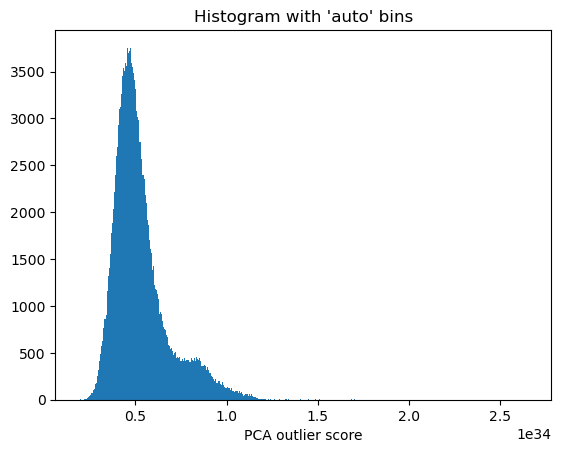

In [23]:
import matplotlib.pyplot as plt
plt.hist(pca.decision_scores_ , bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.xlabel('PCA outlier score')
plt.show()

In [24]:
import numpy as np
threshold = pca.threshold_
threshold

def descriptive_stat_threshold(df,pred_score, threshold):
    
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 
    stat = df.groupby('Group').mean().round(2).reset_index()
    stat = cnt.merge(stat, left_on='Group',right_on='Group') 
    return (stat)

stats_pca = descriptive_stat_threshold(data_final,pca.decision_function(data_final), threshold)

In [25]:
print(stats_pca)

     Group   Count   Count %  Provider Id  Provider Zip Code  \
0   Normal  154911  94.99954         0.00              -0.01   
1  Outlier    8154   5.00046        -0.05               0.13   

   Total Discharges  Average Covered Charges  Average Total Payments  \
0              0.02                    -0.10                   -0.11   
1             -0.40                     1.83                    2.12   

   Average Medicare Payments  Medicare_Payment_Ratio  ...     1     2     3  \
0                      -0.11                   -0.04  ...  0.00 -0.01 -0.00   
1                       2.12                    0.82  ... -0.01  0.17  0.06   

      4     5     6     7     8     9  Anomaly_Score  
0  0.01  0.00 -0.00 -0.00  0.01 -0.00   5.065715e+33  
1 -0.15 -0.03  0.03  0.07 -0.25  0.04   9.701768e+33  

[2 rows x 40 columns]


# KNN

In [26]:
non_numeric_columns = data_final.select_dtypes(include=['object']).columns

In [27]:
data_final.select_dtypes(include=['object']).columns

Index(['Group'], dtype='object')

In [28]:
from sklearn.preprocessing import LabelEncoder

for column in non_numeric_columns:
    le = LabelEncoder()
    data_final[column] = le.fit_transform(data_final[column])

In [29]:
import numpy as np
import pandas as pd
from pyod.models.knn import KNN

# Set up the kNN model
knn = KNN(contamination=0.05)  # Set the expected proportion of outliers
knn.fit(data_final)

# Retrieve the anomaly scores
y_train_scores = knn.decision_scores_

# Set a threshold for determining anomalies
threshold = np.percentile(y_train_scores, 95)

# Function to calculate and return descriptive statistics
def descriptive_stat_threshold(df, pred_scores, threshold):
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_scores
    df['Group'] = np.where(df['Anomaly_Score'] < threshold, 'Normal', 'Outlier')

    # Calculate summary statistics
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score': 'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100
    stat = df.groupby('Group').mean().round(2).reset_index()
    stat = cnt.merge(stat, left_on='Group', right_on='Group')
    return stat

# Call the function and print the results
stats_knn = descriptive_stat_threshold(data_final, y_train_scores, threshold)
print(stats_knn)


     Group   Count   Count %  Provider Id  Provider Zip Code  \
0   Normal  154911  94.99954         0.00              -0.00   
1  Outlier    8154   5.00046        -0.07               0.09   

   Total Discharges  Average Covered Charges  Average Total Payments  \
0              0.02                    -0.08                   -0.09   
1             -0.32                     1.43                    1.71   

   Average Medicare Payments  Medicare_Payment_Ratio  ...     1     2     3  \
0                      -0.09                   -0.04  ...  0.00 -0.01 -0.00   
1                       1.70                    0.71  ... -0.02  0.15  0.05   

      4     5     6     7     8     9  Anomaly_Score  
0  0.01  0.00  0.00 -0.00  0.01 -0.00   9.056826e+28  
1 -0.12 -0.02 -0.02  0.04 -0.17  0.04   6.143261e+30  

[2 rows x 40 columns]


# Anomaly Detection Analysis

## Understanding PCA and kNNs

### Principal Component Analysis (PCA)
Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This is done in such a way that the first principal component has the largest possible variance (accounting for as much of the variability in the data as possible), and each succeeding component, in turn, has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.

### k-Nearest Neighbors (kNN)
k-Nearest Neighbors (kNN) is a simple algorithm that stores all available cases and classifies new cases by a majority vote of its k neighbors. The case being assigned to the class is most common among its k nearest neighbors measured by a distance function. kNN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification. The kNN algorithm is among the simplest of all machine learning algorithms.

## Anomaly Detection

An analysis was performed using both PCA and kNN to identify anomalous providers within the dataset. The anomalies were determined by examining the variation and distribution of the dataset after applying the respective algorithms.

### Small Cluster Identification
The objective was to identify a small cluster that could be labeled as suspicious. The size of the cluster is not large, indicating a relatively small number of outliers within the dataset.

### Analysis of Anomalous Clusters
The clusters identified as anomalous were those that had average statistics significantly different from the rest of the data. For instance, as observed from the outputs, outliers tend to have higher average Medicare payments and total payments, which is substantially different from the 'Normal' group. These deviations from the norm suggest that the providers in the outlier group may be engaging in practices that are not consistent with the majority, warranting further investigation.

### Business Insights
The key business insight from the anomaly detection analysis is the identification of providers whose billing patterns deviate from the norm. These deviations could be indicative of fraudulent behavior or inefficiencies that require rectification. For instance, significantly higher Medicare payments may suggest potential overcharging or exploitation of the billing system, which can be a focus area for cost control and compliance measures.

By focusing on these outliers, the organization can investigate specific cases to determine the cause of the anomalies and take appropriate actions, such as conducting audits or implementing new controls to prevent future anomalies of a similar nature.

## Conclusion
The application of PCA and kNN for anomaly detection has enabled the identification of providers who are outliers in the dataset. These findings provide a starting point for further analysis and action, which can help the organization in ensuring the integrity and efficiency of its operations.


# Future Scope for Medicare Data Analysis Project

## Integrating Additional Data

Exploring more dimensions in the CMS data can enhance the depth of the analysis:

- **DRG Analysis**: Investigate the Medicare Severity Diagnosis Related Group (DRG) data to study service utilization patterns.
- **Geographical Insights**: Analyze regional differences in Medicare service utilization and billing practices.
- **Temporal Trends**: Conduct time-series analysis to spot temporal anomalies and trends over the years.

## Broadening the Scope to New Care Settings

Expanding the analysis to various care settings can offer a holistic view of Medicare services:

- Skilled Nursing Facilities (SNF)
- Outpatient Services
- Home Health Agencies (HHA)
- Hospice Care

## Leveraging Provider Characteristics

Combine your findings with provider-specific data to assess the correlation between provider characteristics and anomalies.

## Utilizing CMS Data Tools

Employ CMS's interactive tools to refine data selection:

- [Data Navigator](https://dnav.cms.gov/)
- [Physician and Other Supplier Look-up Tool](https://data.cms.gov/)

## Real-time Analysis with API-enabled Data

Take advantage of the API-enabled datasets for timely anomaly detection:

- Interactive data analysis at [Data.CMS.gov](https://data.cms.gov/)

## Conducting Longitudinal Studies

Study changes within the same entities over time to understand long-term trends and their implications.

## Predictive Modeling

Develop models to predict future trends based on historical data, which can be vital for proactive anomaly detection.

## Collaboration with Policy Makers

Share insights with policymakers to inform regulations aimed at maintaining the integrity of the Medicare system.

## Conclusion

By leveraging additional CMS datasets and analytical tools, the project can significantly contribute to healthcare analytics and inform data-driven decision-making in healthcare policy.

For further details on the datasets and tools, visit the [CMS Data Catalog](https://data.cms.gov/provider-summary-by-type-of-service/medicare-inpatient-hospitals/medicare-inpatient-hospitals-by-provider-and-service).

